<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/eda_credit_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of Credit Approval Data 

## Goal

To predict whether the customer will default on their credit card payment next month.

This exploratory data analysis should assits to:
1. Understand variable relations within the underlyind data.
2. Identity data transformations required for modeling
3. Identify any required data cleaning
4. Generate research questions 

## Dataset

> Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [6]:
#@title ##Setup
#@markdown Import data manipulation and plotting dependencies.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import data_table
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Dataset columns:

- LIMIT_BAL: credit card limit
- SEX, EDUCATION, MARRIAGE, AGE: client demographic features
- BILL_AMT[1-6]: amount on bill statement for April-September
- PAY_AMT[1-6]: payment amount for April-September
- default payment next month: target, whether the client defaulted the following month

In [2]:
# Load the data
data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(io=data_url, header=1).drop(columns=['ID']).rename(columns={'PAY_0':'PAY_1'})
data_table.DataTable(df.sample(50), include_index=False, num_rows_per_page=5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7755,60000,2,2,2,29,-1,2,2,-1,2,2,4603,4186,0,1887,1543,3972,0,0,1887,0,3557,0,0
1582,50000,2,3,2,40,0,0,0,0,0,0,5538,6563,7422,8292,8465,8650,1271,1130,1000,307,325,436,0
25442,120000,2,1,2,28,0,0,0,0,0,0,50477,52632,55282,56878,57948,59179,3500,4000,3500,2500,2200,2200,1
21937,200000,2,1,2,27,-1,-1,-2,-1,-1,-2,1171,0,0,680,0,0,0,0,680,0,0,442,0
25111,50000,1,3,1,55,-1,-1,-1,0,0,0,1344,780,13032,14292,16698,15436,1200,13032,1500,3000,554,2000,0
11689,360000,2,1,2,29,-1,-1,-1,-1,-1,-1,5751,1501,624,0,1000,1866,1501,624,0,1000,1866,252,0
15189,90000,2,2,2,24,1,2,0,0,0,0,88550,78892,75808,63362,65300,67248,3000,3500,3000,3000,3000,5000,1
545,390000,2,1,2,31,0,0,0,0,0,0,50620,43220,44237,46495,47751,51941,5000,3000,3000,2000,5000,5000,0
2970,400000,2,3,1,37,0,0,0,0,0,0,76917,79075,81864,83747,85487,88315,4000,4000,3000,3000,4000,4000,0
8536,230000,2,1,2,24,0,0,0,0,0,0,69158,73712,68831,61534,25914,36313,8149,2214,5904,5542,15502,5000,0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


- Unbalanced dataset. Customer default(default payment next month) shows 22% samples labeled as default.

- 

## Descriptive Statistics




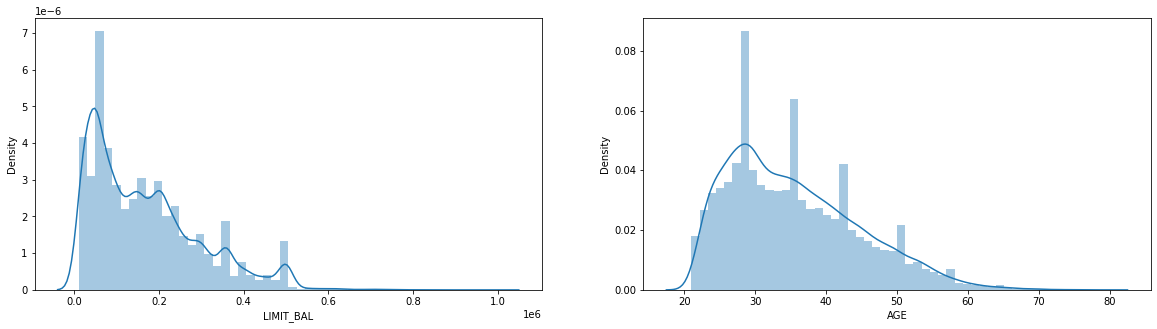

In [8]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE);

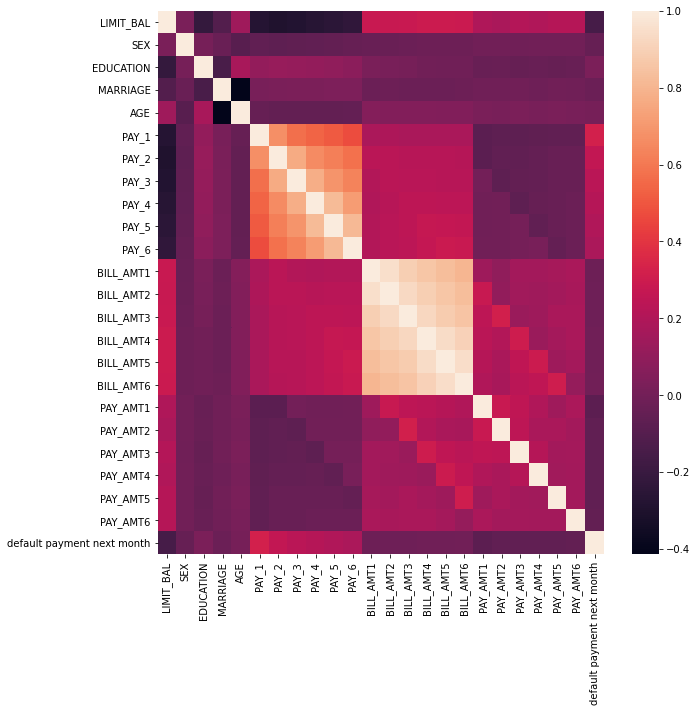

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr());

## Research questions

National consumer protection agencies enforces equal credit opportunity laws in different countries, which generally prohibits credit discrimination on the basis of sex, marital status or age.

- Is there a correlation between sex, age, mariages and the credit approval status? 

- Can this relationship be used to predict if a person is in risk of default(grant credit status)?
 
- If yes, does the relationship indicate reasonable risk management strategies?
